<a href="https://colab.research.google.com/github/luisaah/enem-2019/blob/main/Bootcamp_Dados_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [704]:
import pandas as pd

In [705]:
dados = pd.read_csv('A160324189_28_143_208.csv',
                    encoding = 'ISO-8859-1',
                    skiprows = 3,
                    sep = ';',
                    skipfooter = 12,
                    thousands = '.',
                    decimal = ',')

# O 'encoding' é devido aos caracteres utilizados como til e acentos
# 'skiprows' é para pular as primeiras três linhas que são uma espécie de cabeçalho
# Os valores estão usando vírgula como separador decimal, logo o python entende eles como string, por isso é necessários o 'thousands' e o 'decimal'

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  import sys




---



---


# Aula 01

In [706]:
dados.head()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71


In [707]:
dados.tail()

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
22,43 Rio Grande do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,93172414.99,94415257.59,94228158.01,86424773.65,91598179.14,85793700.48,82737574.48,91825671.54,77582012.38,91078325.19,91926773.80,91678131.98,90989887.85,94861008.10,96799643.23,87344269.09,97371100.06,90190767.67,81748880.30,92467100.02,85301000.44,91624338.70,92787953.22,99117643.75,95840509.87,103028189.47,98546110.10,94369189.80,96913904.71,90971809.22,88720873.59,97474362.62,85451646.35,84651396.59,76294596.96,86076113.42,89019478.82,78929703.81,28349257.38,11958647088.33
23,50 Mato Grosso do Sul,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16323017.60,16892566.36,17019787.73,15808304.19,16071645.95,15687000.65,15040368.93,16146431.63,14703494.87,16969878.14,17062906.92,17068192.56,17143032.30,17435039.90,18239321.45,16963131.37,17677185.62,16363926.26,16149109.15,16902636.63,16964757.79,17259392.23,18147562.63,19143242.28,17905638.97,18126954.44,19217982.14,18904364.43,18812185.96,18316480.80,17844511.04,18653296.92,17769247.00,17357008.80,15652772.51,16703851.10,15838659.34,12508717.35,4059220.22,2172157981.36
24,51 Mato Grosso,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,16194037.75,16508402.55,16749377.27,15416292.84,16251545.59,14659894.99,14473688.30,15578896.35,14592428.67,17252931.32,15921801.14,16732272.17,16075073.71,16479008.11,16011187.69,15357273.96,16834151.93,15474405.82,14234942.30,15055383.98,14478906.98,15976701.25,16026760.63,17304334.81,16131820.19,16467803.96,16532335.42,15596133.69,16514764.99,15097362.41,13827706.20,15445693.74,14431171.87,14444207.60,11943713.53,13981483.29,14585009.42,13083151.70,6174224.99,2036923784.59
25,52 Goiás,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,33663853.68,33958341.89,36899367.18,32721458.05,35621496.15,32535396.77,32332573.53,33702293.07,30923462.58,34861711.53,33764503.14,36357757.30,33492211.73,35313884.40,35380148.68,33780632.05,35990491.96,34862475.74,34050646.02,34795831.02,33279088.23,34951022.38,36207403.69,37750841.56,35372150.57,36473617.92,38399592.70,36335534.96,37171427.64,36234132.35,34050298.55,36312121.02,34158023.81,34558308.52,27499307.93,31870107.62,34437633.20,33499284.38,20242641.73,4657348958.66
26,53 Distrito Federal,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,18573610.32,17541378.12,19143091.84,17949844.52,18200213.74,17409701.46,16038710.79,18976846.56,18389240.38,19746542.97,19508159.58,19463161.26,18400388.35,18783802.78,20291741.30,19388061.07,19677470.12,18397893.23,17564774.75,19662949.33,18270823.61,20046081.24,20602037.52,21101108.01,19361819.39,21514926.74,21133361.51,20963621.60,21333585.20,19617400.92,19207148.01,20429067.27,18219172.96,19405446.88,18123899.78,21437430.22,23479773.03,22233542.26,12044848.02,2429933198.76


In [708]:
dados.mean()

# Os resultados estão em notação científica

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [709]:
pd.options.display.float_format = "{:.2f}".format

# Essa opção configura a forma como os dados serão mostrados

In [710]:
dados.mean()

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Abr     40005678.92
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
Total      5993724452.01
Length: 157, dtype: float64

In [711]:
# Selecionando uma coluna
# O retorno é uma Series

dados['2008/Ago']

0      2938286.29
1      1886871.84
2      8331763.97
3      1045291.11
4     23259148.28
5      1550340.63
6      5213290.38
7     14609872.57
8     10645917.52
9     29304821.51
10    10812840.19
11    12673774.35
12    31705296.79
13     9262767.68
14     4543252.50
15    43254543.33
16    80374117.08
17    12384068.19
18    42487939.51
19   179898070.22
20    56699001.13
21    28887854.62
22    56233758.74
23     9602843.49
24     8987811.95
25    21041071.33
26    11548451.89
Name: 2008/Ago, dtype: float64

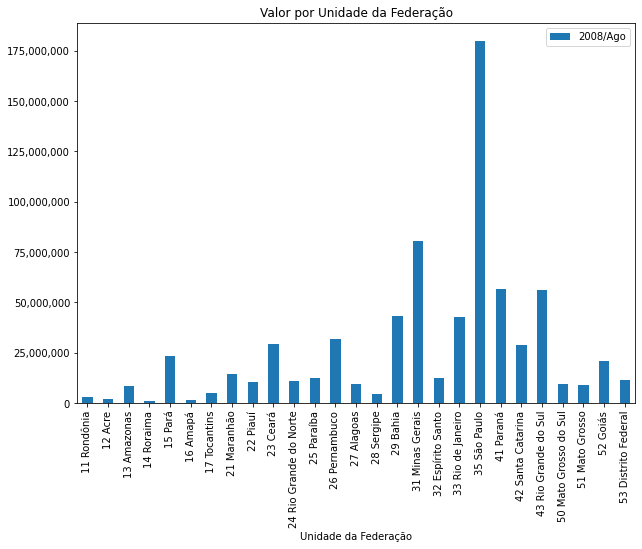

In [712]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


ax = dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind = 'bar', figsize = (10,7))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plt.title('Valor por Unidade da Federação')

plt.show() # Única saída é o gráfico, fica mais limpo

## Desafio 01

Escolher um título mais descritivo para o gráfico.

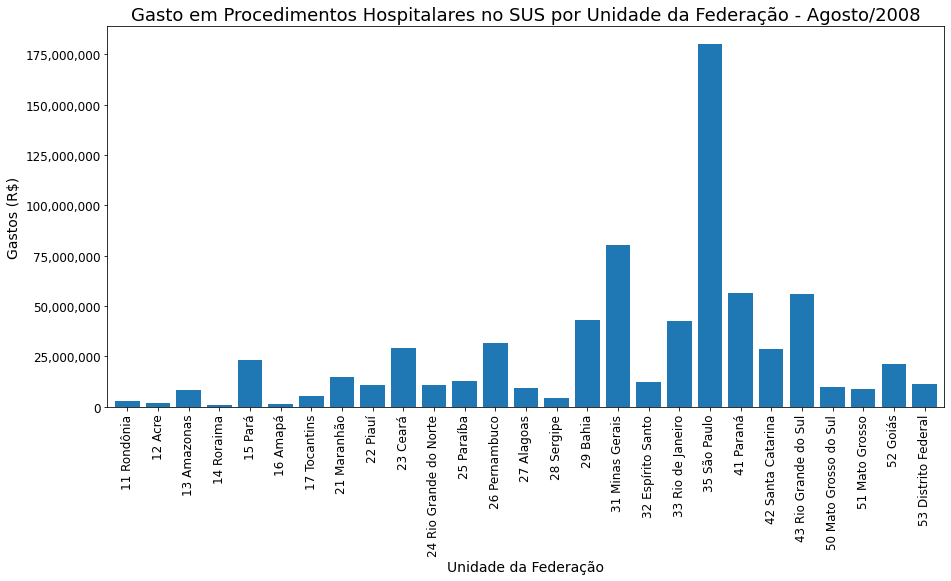

In [713]:
ax = dados.plot(x = 'Unidade da Federação', y = '2008/Ago', kind = 'bar', figsize = (15,7), legend = False, width = 0.8, fontsize = 12)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14)
ax.set_xlabel('Unidade da Federação', fontsize = 14)
plt.title('Gasto em Procedimentos Hospitalares no SUS por Unidade da Federação - Agosto/2008', fontsize = 18)
plt.show()

## Desafio 02

Plotar o mesmo gráfico para o mês mais recente do dataset.

In [714]:
# Possui um dado "em branco" ("-"), precisamos substituir primeiro por zero

dados['2020/Ago'] = dados['2020/Ago'].replace('-', 0.0).astype('float')
dados['2020/Ago']

0      3556381.57
1            0.00
2      4726485.73
3      1524478.04
4     11559714.54
5       834187.31
6      2453362.74
7     10916718.78
8      7926321.69
9     14559529.59
10     8080160.97
11     8585226.08
12    33544876.14
13     6487947.82
14     1742127.72
15    26023558.53
16    57473699.06
17    10824255.26
18    36264322.65
19   140414944.95
20    41542401.16
21    16991236.43
22    28349257.38
23     4059220.22
24     6174224.99
25    20242641.73
26    12044848.02
Name: 2020/Ago, dtype: float64

In [715]:
dados['Nome do Estado'] = dados['Unidade da Federação'].str.slice(start = 3)
nomes_estados = dados['Nome do Estado']
nomes_estados

0                Rondônia
1                    Acre
2                Amazonas
3                 Roraima
4                    Pará
5                   Amapá
6               Tocantins
7                Maranhão
8                   Piauí
9                   Ceará
10    Rio Grande do Norte
11                Paraíba
12             Pernambuco
13                Alagoas
14                Sergipe
15                  Bahia
16           Minas Gerais
17         Espírito Santo
18         Rio de Janeiro
19              São Paulo
20                 Paraná
21         Santa Catarina
22      Rio Grande do Sul
23     Mato Grosso do Sul
24            Mato Grosso
25                  Goiás
26       Distrito Federal
Name: Nome do Estado, dtype: object

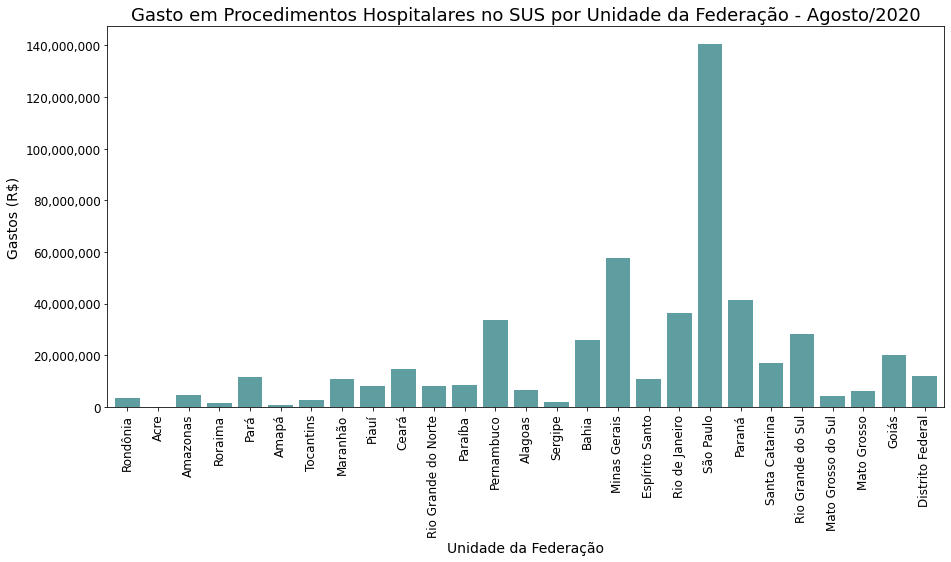

In [716]:
ax = dados.plot(x = 'Nome do Estado', y = '2020/Ago', kind = 'bar', figsize = (15,7), legend = False, width = 0.8, fontsize = 12, color = '#5F9EA0')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14)
ax.set_xlabel('Unidade da Federação', fontsize = 14)
plt.title('Gasto em Procedimentos Hospitalares no SUS por Unidade da Federação - Agosto/2020', fontsize = 18)
plt.show()

**Ideias para análises adicionais:**

- Gastos vs População ou Gastos por Habitante
- A mesma anterior porém levando em consideração distribuição etária
- Analisar por municípios
- Os municípios com maior gasto são todos capitais?



---

# Aula 02

In [717]:
dados[['2008/Ago', '2008/Set']].head()

,2008/Ago,2008/Set
0,2938286.29,2843930.91
1,1886871.84,2084884.80
2,8331763.97,8148089.92
3,1045291.11,1003740.89
4,23259148.28,23667690.01


In [718]:
dados.mean()

# Só retorna resultado para as colunas que tem todos os valores

2007/Ago       304952.77
2007/Set       788145.26
2007/Out      2440162.96
2007/Nov      5517354.05
2007/Dez     12337159.42
                ...     
2020/Mai     46769027.82
2020/Jun     45367349.74
2020/Jul     40717083.95
2020/Ago     19144523.30
Total      5993724452.01
Length: 158, dtype: float64

In [719]:
# Pegando as colunas que não tem valores NaN
colunas_usaveis = dados.mean().index.to_list()

# O index é uma lista imutável, por isso não podemos usar o .insert na expressão acima!
# Faremos essa adição na linha seguinte:
colunas_usaveis.insert(0, 'Unidade da Federação')
colunas_usaveis

['Unidade da Federação',
 '2007/Ago',
 '2007/Set',
 '2007/Out',
 '2007/Nov',
 '2007/Dez',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Set',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',


In [720]:
usaveis = dados[colunas_usaveis]
usaveis.head()

,Unidade da Federação,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,420668039.63
2,13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,332

Excluímos as colunas que possuem NaN.

Alterando o índice para o nome dos estados:

In [721]:
usaveis = usaveis.set_index('Unidade da Federação')
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,420668039.63
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.2

Com essa mudança do índice podemos buscar facilmente a linha correspondente a qualquer estado:

In [722]:
usaveis.loc['12 Acre']

2007/Ago       10470.07
2007/Set       14001.71
2007/Out       86200.85
2007/Nov      301323.68
2007/Dez      769612.36
               ...     
2020/Mai     2383895.48
2020/Jun     2199920.70
2020/Jul     1163813.08
2020/Ago           0.00
Total      420668039.63
Name: 12 Acre, Length: 158, dtype: float64

Plotando esses dados, o gráfico fica "esquisito" pois considera os estados como eixo 'x' e uma linha por mês.

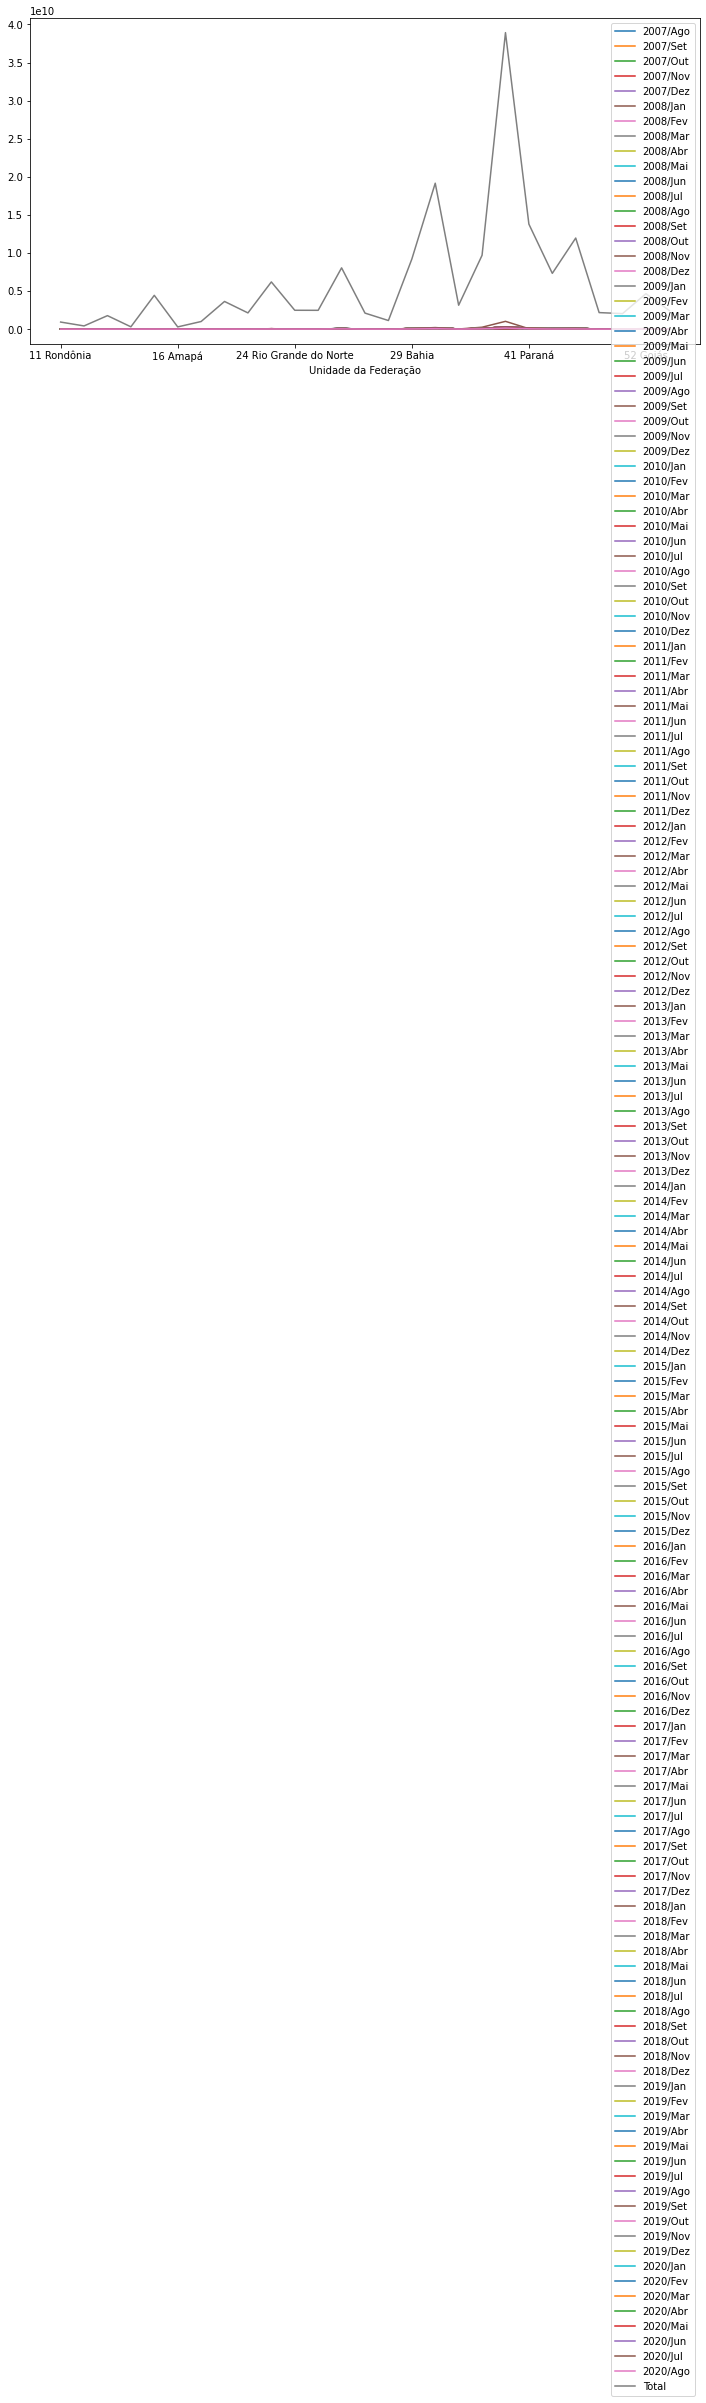

In [723]:
usaveis.plot(figsize = (12,6))

Para alterar isso precisamos transpor a "tabela", fazemos isso utilizando .T

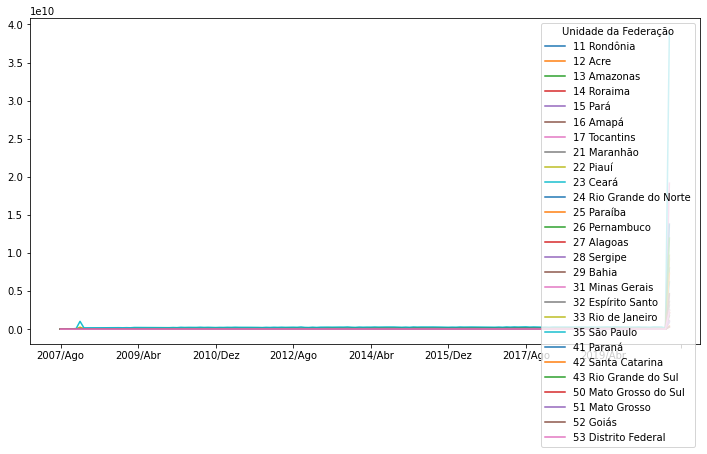

In [724]:
usaveis.T.plot(figsize = (12,6))

O gráfico ficou ruim por causa dos valores altíssimos à direita.

Esses valores correspondem à coluna de "Total" do DataFrame.

Vamos tirar essa linha para poder gerar o gráfico.

In [725]:
usaveis = usaveis.drop('Total', axis = 1)

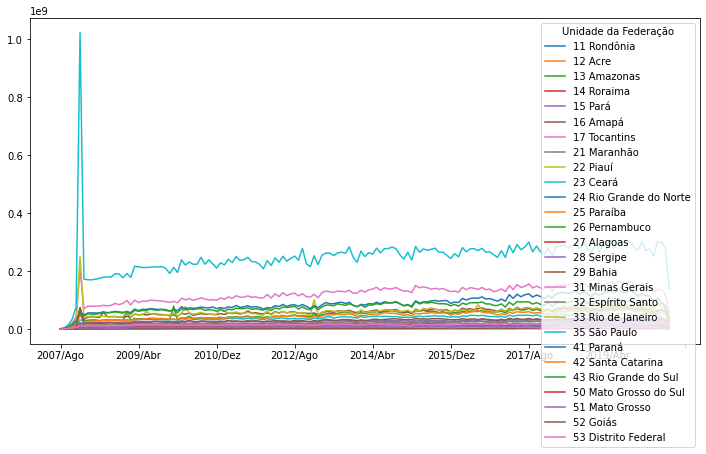

In [726]:
usaveis.T.plot(figsize = (12,6))

## Desafio 01
Colocar a legenda de forma que não fique em cima do gráfico.

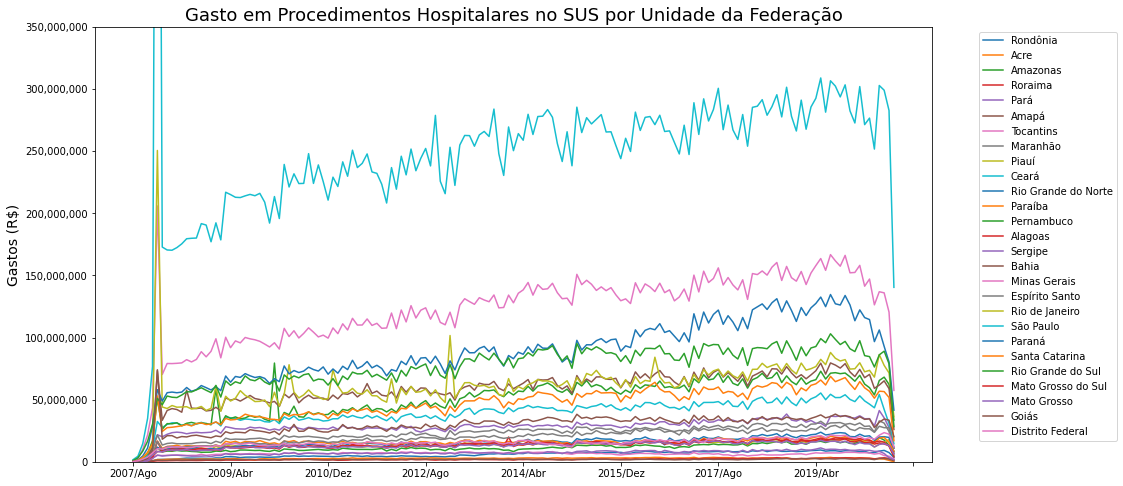

In [727]:
ax = usaveis.T.plot(figsize = (15,8))
plt.legend(nomes_estados, loc = 'upper left', bbox_to_anchor=(1.05, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14)
ax.set_ylim((0,350000000))
plt.title('Gasto em Procedimentos Hospitalares no SUS por Unidade da Federação', fontsize = 18)
plt.show()

## Desafio 02
Plotar dados de apenas 5 estados.

Escolhi os 5 últimos estados do DataFrame, usando **.tail()**

In [728]:
estados_grafico = dados['Unidade da Federação'].tail().to_list()
nomes_estados_grafico = dados['Unidade da Federação'].tail().str.slice(start = 3).to_list()

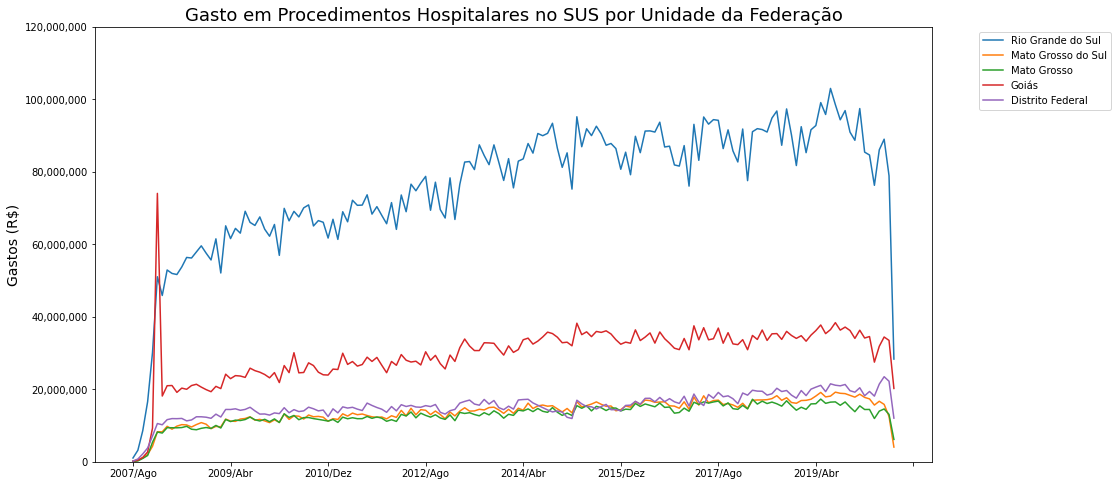

In [729]:
ax = usaveis.loc[estados_grafico].T.plot(figsize = (15,8))
plt.legend(nomes_estados_grafico, loc = 'upper left', bbox_to_anchor=(1.05, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14)
ax.set_ylim((0,120000000))
plt.title('Gasto em Procedimentos Hospitalares no SUS por Unidade da Federação', fontsize = 18)
plt.show()



---



---


# Aula 03

Plotando o gráfico com os 5 estados que mais gastam.

In [730]:
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

É possível produzir slices a partir dessa lista.

In [731]:
usaveis.T.columns[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [732]:
usaveis.index[:5]

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará'], dtype='object', name='Unidade da Federação')

In [733]:
usaveis[:5]

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8140639.49,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13909566.03,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2761536.23,2699213.85,2682746.28,2

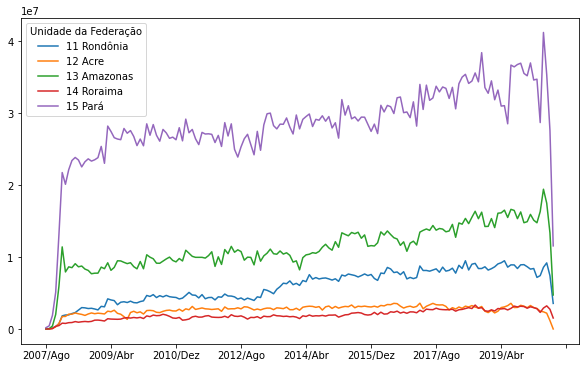

In [734]:
usaveis[:5].T.plot(figsize = (10, 6))

Podemos também pegar 7 estados aleatórios.

Para isso utilizaremos o mesmo "seed" para poder reproduzir os mesmos resultados.

In [735]:
import numpy as np

In [736]:
np.random.seed(687942)
# O seed só é válido nessa célula

usaveis.sample(n = 7)

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
32 Espírito Santo,57408.11,284224.80,1152115.25,2296383.23,5724199.54,16212109.41,10032886.43,12262049.08,12453466.98,11789786.09,11889687.35,12205584.14,12384068.19,12486952.61,12846257.93,12885677.54,12531576.01,13448667.55,11902752.05,14490295.47,14203837.61,15160988.21,14348102.03,15198601.34,15633491.30,14884339.35,14470016.36,14561150.72,13832954.49,14019840.33,13041820.98,16875676.05,15184135.29,15913263.87,15189197.44,15929495.86,17000988.44,16055300.15,16763684.01,16487379.66,...,26707993.40,25313642.38,26021925.50,26797874.70,25336305.29,26875836.29,25257656.90,24276121.39,25480248.19,22686672.67,25266729.61,25975106.39,27444564.56,24444622.13,25716796.37,25498522.61,24338227.14,26158845.99,24671664.41,24683685.86,25201039.31,24710171.75,26740727.97,25981058.40,28690916.87,25936888.97,28550512.79,29298721.79,27429269.40,29709557.40,26236636.40,25163041.42,27533550.66,26542802.84,26555688.68,23735724.64,28614683.75,27450865.16,27460475.47,10824255.26
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
24 Rio Grande do Norte,134605.36,272088.08,684678.30,1695824.89,4730811.68,11763899.23,9110108.87,10126626.54,10964234.85,11032871.23,10450599.08,11119053.52,10812840.19,11258681.53,10572190.95,10164720.86,10753451.61,10207998.29,10721328.37,12298227.11,11640067.28,12397524.20,12629319.37,13174277.04,12744328.16,13440066.99,13526034.42,13153398.69,12493128.23,12729297.56,11551990.57,15162136.63,13649319.45,14242023.19,12551831.85,13470311.65,14156977.75,13940868.00,13272057.48,13473107.56,...,20227425.64,18861445.44,18766514.59,20028976.78,18531262.60,18122577.13,18169461.87,18118258.43,19045469.42,18254034.58,20972187.31,20717428.90,21991859.64,20909808.17,21544864.14,22616858.75,19926336.21,22290820.67,20445273.59,19380375.16,21147377.76,20770925.83,21775213.78,22206576.63,23819430.58,21613567.61,22137087.77,23073307.72,23437265.73,23085765.53,20350167.95,20135895.21,22201116.15,20512979.08,20936692.02,17319947.66,19916570.52,20219961.81,19593057.45,8080160.97
17 Tocantins,4113.76,76633.06,343702.61,1068685.94,3022200.87,5136474.61,5051932.07,5200151.87,5343714.73,5344487.99,5398413.09,5061461.61,5213290.38,5201400.94,6013071.44,5205114.37,5614918.90,6

Criando uma nova coluna com o total de cada estado.

In [737]:
usaveis['Total'] = usaveis.sum(axis = 1)
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129055.39
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,420666755.81
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771652039.82
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2699213.85,2682746.28,2891100.2

Queremos agora ordenar pela coluna total, do maior gasto para o menor.

Uma vez que esteja ordenado, vamos retirar a coluna 'Total'.

In [738]:
ordenado_por_total = usaveis.sort_values(by = 'Total', ascending = False)
ordenado_por_total = ordenado_por_total.drop('Total', axis = 1)
ordenado_por_total.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1665349.90,4434168.64,14577395.84,35032259.98,76668547.41,1023564534.21,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
31 Minas Gerais,971394.37,2861781.50,10018011.35,21730281.63,43429517.54,205912743.65,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
41 Paraná,554800.22,1431708.01,4630402.44,11120030.79,28790722.87,58081334.45,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
43 Rio Grande do Sul,1049252.33,3182913.14,8571312.11,16592432.80,30134255.70,51064610.03

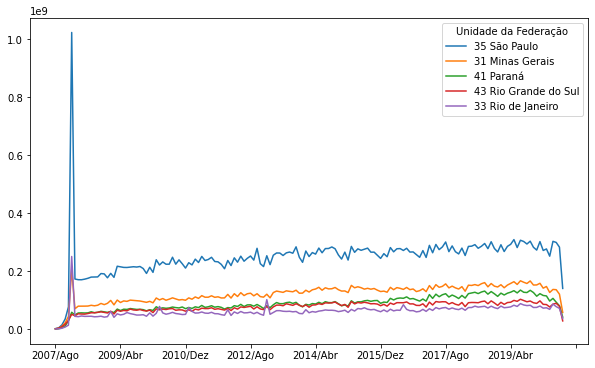

In [739]:
ordenado_por_total.head(5).T.plot(figsize = (10, 6))

Os valores altíssimos no início dos registros pode ser devido a algum acontecimento na área da saúde ou, muito possivelmente, por ser a data em que se inicia o dataset.

Portanto, vamos retirar esses dados (são as seis primeiras colunas).

In [740]:
colunas_interessadas = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessadas]

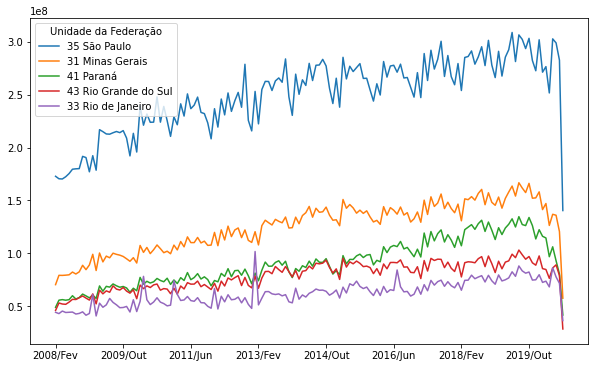

In [741]:
ordenado_por_total.head(5).T.plot(figsize = (10, 6))

Percebe-se uma certa sazonalidade nos dados.

Ideias para mais análises:
- Gasto por mês entre os anos

## Desafio 01

Alterar as cores do gráfico com matplotlib.

O código abaixo cria o conjunto de 27 cores (uma para cada estado) utilizando o colormap do matplotlib.

Outras opções de colomaps:

https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html

In [742]:
n = 27
colors = plt.cm.gist_rainbow(np.linspace(0,1,n))
colors

array([[1.        , 0.        , 0.16      , 1.        ],
       [1.        , 0.02861685, 0.        , 1.        ],
       [1.        , 0.24059353, 0.        , 1.        ],
       [1.        , 0.45257022, 0.        , 1.        ],
       [1.        , 0.6645469 , 0.        , 1.        ],
       [1.        , 0.87652358, 0.        , 1.        ],
       [0.91149974, 1.        , 0.        , 1.        ],
       [0.72072072, 1.        , 0.        , 1.        ],
       [0.50874404, 1.        , 0.        , 1.        ],
       [0.29676736, 1.        , 0.        , 1.        ],
       [0.08479067, 1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.12650221, 1.        ],
       [0.        , 1.        , 0.33733924, 1.        ],
       [0.        , 1.        , 0.54817626, 1.        ],
       [0.        , 1.        , 0.73792958, 1.        ],
       [0.        , 1.        , 0.9487666 , 1.        ],
       [0.        , 0.83866155, 1.        , 1.        ],
       [0.        , 0.62553282,

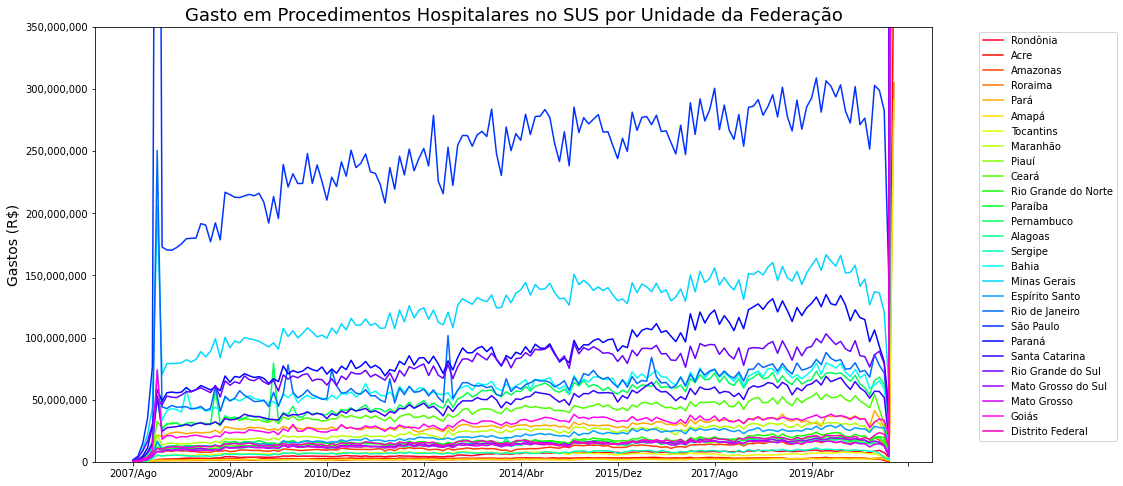

In [743]:
ax = usaveis.T.plot(figsize = (15,8), color = colors)
plt.legend(nomes_estados, loc = 'upper left', bbox_to_anchor=(1.05, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14)
ax.set_ylim((0,350000000))
plt.title('Gasto em Procedimentos Hospitalares no SUS por Unidade da Federação', fontsize = 18)

plt.show()

## Desafio 02

Criar um coluna que indique a região de cada estado.

In [744]:
usaveis.T.columns

Index(['11 Rondônia', '12 Acre', '13 Amazonas', '14 Roraima', '15 Pará',
       '16 Amapá', '17 Tocantins', '21 Maranhão', '22 Piauí', '23 Ceará',
       '24 Rio Grande do Norte', '25 Paraíba', '26 Pernambuco', '27 Alagoas',
       '28 Sergipe', '29 Bahia', '31 Minas Gerais', '32 Espírito Santo',
       '33 Rio de Janeiro', '35 São Paulo', '41 Paraná', '42 Santa Catarina',
       '43 Rio Grande do Sul', '50 Mato Grosso do Sul', '51 Mato Grosso',
       '52 Goiás', '53 Distrito Federal'],
      dtype='object', name='Unidade da Federação')

A lógica da numeração por região é a seguinte:

Início 1 -> Região Norte

Início 2 -> Região Nordeste

Início 3 -> Região Sudeste

Início 4 -> Região Sul

Início 5 -> Região Centro-oeste

Vou criar uma coluna pegando o primeiro dígito de cada nome em 'Unidade da Federação'.

In [745]:
dados['Região'] = dados['Unidade da Federação'].str.slice(stop = 1)
dados['Região']

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     2
8     2
9     2
10    2
11    2
12    2
13    2
14    2
15    2
16    3
17    3
18    3
19    3
20    4
21    4
22    4
23    5
24    5
25    5
26    5
Name: Região, dtype: object

Criada essa coluna, vou substituir os valores pelos nomes das regiões.

In [746]:
type(dados['Região'][0])

str

Os valores ficaram salvos como string.

Em seguida, criei um dicionário com as correspondências:

In [747]:
regioes = {'1': 'Norte', '2': 'Nordeste', '3': 'Sudeste', '4': 'Sul', '5': 'Centro-oeste'}

Agora, basta substituir os números pelo nome das regiões.

In [748]:
dados['Região'].replace(regioes, inplace = True)
dados['Região']

0            Norte
1            Norte
2            Norte
3            Norte
4            Norte
5            Norte
6            Norte
7         Nordeste
8         Nordeste
9         Nordeste
10        Nordeste
11        Nordeste
12        Nordeste
13        Nordeste
14        Nordeste
15        Nordeste
16         Sudeste
17         Sudeste
18         Sudeste
19         Sudeste
20             Sul
21             Sul
22             Sul
23    Centro-oeste
24    Centro-oeste
25    Centro-oeste
26    Centro-oeste
Name: Região, dtype: object

Achei interessante agrupar os dados por região e plotar.

In [749]:
dados.groupby(by = 'Região').sum()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Região,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Centro-oeste,634465.91,1994139.86,5361386.06,10261713.14,26088084.77,101139358.42,44574514.79,51830387.75,51359623.44,50283669.63,52009888.28,51265708.77,51180178.66,52934204.45,53081928.67,52045894.18,49701015.57,53779527.53,51535369.24,62084658.66,59721577.61,61055214.57,61061605.92,61368348.10,65646951.59,62286860.39,60853444.35,60309484.79,57942210.25,61510507.36,56905819.66,67930541.39,62094796.54,69948537.90,62607799.75,62701526.87,67508546.42,65547681.48,63011373.59,62074258.52,...,84754519.35,84900688.92,89811624.02,81895899.60,86144901.43,80291993.87,77885341.55,84404467.61,78608626.50,88831063.96,86257370.78,89621383.29,85110706.09,88011735.19,89922399.12,85489098.45,90179299.63,85098701.05,81999472.22,86416800.96,82993576.61,88233197.10,90983764.47,95299526.66,88771429.12,92583303.06,95283271.77,91799654.68,93831963.79,89265376.48,84929663.80,90840178.95,84577615.64,85764971.80,73219693.75,83992872.23,88341074.99,81324695.69,42520934.96,11296363923.37
Nordeste,1863465.81,4373676.55,11981822.18,27667726.92,68937797.91,240233627.20,143170221.70,163986250.16,169546980.47,169279054.51,161307575.30,182631707.98,166813086.44,168149195.92,170330608.76,165396711.32,163085801.66,202595491.38,163451462.14,204609388.78,195038574.57,199391698.85,191469883.45,198725363.21,202722430.11,198393665.99,200684037.33,192584246.77,184367168.39,239363499.24,177953656.96,217389417.25,204724200.36,222675880.46,194423247.10,201845931.69,212368422.20,204038687.98,204915989.17,200577037.43,...,284478452.35,292572852.35,304413487.25,282228280.62,295937549.16,280123199.32,269787499.34,293723811.29,259239528.41,296439744.20,303031041.02,312691505.68,292611640.07,305217110.82,315754956.58,290161937.70,315437604.30,291771630.25,278660709.51,303716429.55,284772373.71,299400607.05,308351934.78,332241953.25,300860901.65,324737398.29,321122642.13,317420669.40,325348004.05,304280785.96,291045984.59,313214292.70,286186822.01,284252110.84,247582825.54,291127863.98,282825489.06,245911328.83,117866467.32,37384256278.39
Norte,274163.86,702698.79,3034989.40,9438700.38,24930500.29,44017418.18,38844188.02,42058042.63,43806481.51,45231240.95,44643930.10,43735684.31,44224992.50,44499904.46,44847041.79,44277312.77,44950230.48,48215212.04,45308586.15,54026837.93,51813801.79,51645252.76,50881864.42,51036564.73,52887096.10,51018856.28,52933630.77,51308379.31,49144353.01,51588403.75,48521391.60,56875455.88,54444882.95,56246429.60,52818872.35,52754387.98,55104821.48,54613086.14,53876926.72,52932831.88,...,68342011.18,68995718.93,70621753.19,68434808.74,69735041.10,67354871.16,66307093.09,69852825.90,62859787.25,70453476.50,70977643.84,74367196.35,70580522.95,72841735.60,75410695.12,71791262.67,77822894.11,70003796.02,68623448.48,72421205.47,67715770.80,72901945.25,71953402.86,72079637.35,68310792.30,78271579.42,77340361.36,76277098.92,78765536.95,75414428.92,74370763.81,77196660.63,73819692.73,71682268.87,65225598.45,83998905.79,75232976.77,58932690.50,24654609.93,9155215791.07
Sudeste,3163621.72,8501821.51,28742187.01,66309452.92,139449387.76,1496254347.26,297291483.85,304755569.67,307074038.20,307411386.26,311017861.48,318279330.75,315144195.00,318035764.58,337698269.16,3

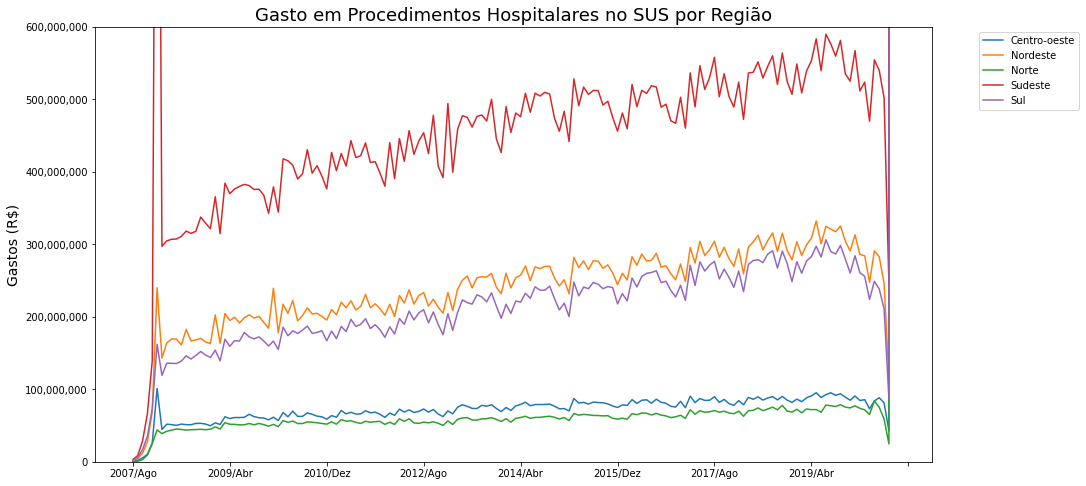

In [750]:
ax = dados.groupby(by = 'Região').sum().T.plot(figsize = (15,8))
plt.legend(loc = 'upper left', bbox_to_anchor=(1.05, 1))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14)
ax.set_ylim((0,600000000))
plt.title('Gasto em Procedimentos Hospitalares no SUS por Região', fontsize = 18)
plt.show()

## Desafio 03

Deixar o gráfico mais "bonito". Melhorar sua legibilidade.

In [751]:
nomes_estados_grafico_ordenados = ordenado_por_total.index.str.slice(start = 3)
nomes_estados_grafico_ordenados

Index(['São Paulo', 'Minas Gerais', 'Paraná', 'Rio Grande do Sul',
       'Rio de Janeiro', 'Bahia', 'Pernambuco', 'Santa Catarina', 'Ceará',
       'Goiás', 'Pará', 'Maranhão', 'Espírito Santo', 'Rio Grande do Norte',
       'Paraíba', 'Distrito Federal', 'Mato Grosso do Sul', 'Piauí', 'Alagoas',
       'Mato Grosso', 'Amazonas', 'Sergipe', 'Tocantins', 'Rondônia', 'Acre',
       'Roraima', 'Amapá'],
      dtype='object', name='Unidade da Federação')

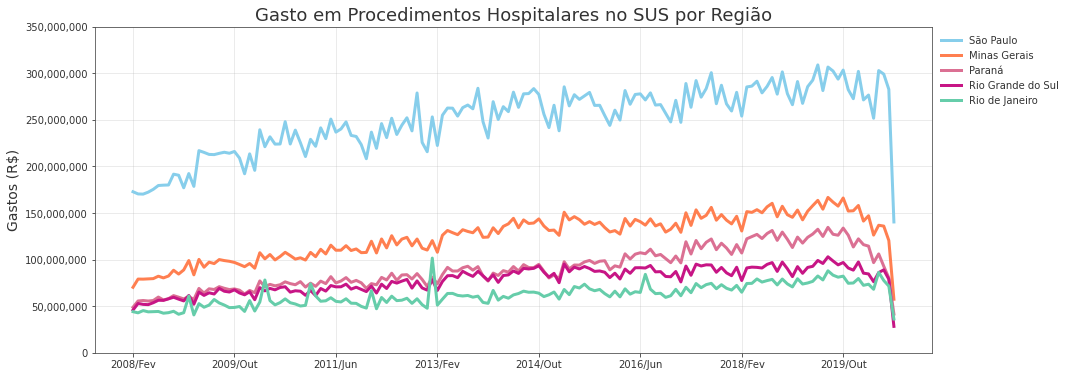

In [752]:
cores = ['SkyBlue', 'Coral', '#DB7093', '#C71585', '#66CDAA']

ax = ordenado_por_total.head(5).T.plot(figsize = (15, 6), linewidth = 3, color = cores)
legend = plt.legend(nomes_estados_grafico_ordenados, loc = 'upper left', bbox_to_anchor=(1, 1), framealpha = 0)
plt.setp(legend.get_texts(), color='#333333')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14, color = '#333333')
ax.set_ylim((0,350000000))
ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['top'].set_color('#4d4d4d')
ax.spines['right'].set_color('#4d4d4d')
ax.spines['left'].set_color('#4d4d4d')
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis= 'y', colors='#333333')
plt.title('Gasto em Procedimentos Hospitalares no SUS por Região', fontsize = 18, color = '#333333')
plt.grid(alpha = 0.3)
plt.show()

## Desafio 04

Adicionar meu estado aos 5 estados de maior gastos (ou outro estado caso ele esteja entre os 5).

Como o estado em que nasci e o que eu moro atualmente já estão entre os cinco, adicionei a Bahia.

In [753]:
estados_escolhidos = ordenado_por_total.head().index.array
estados_escolhidos = np.append(estados_escolhidos, '29 Bahia')
estados_escolhidos = ordenado_por_total.loc[estados_escolhidos]
estados_escolhidos

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172834914.73,170481849.56,170278285.95,172402180.59,175416595.83,179525002.10,179898070.22,180082203.71,191685220.08,190539738.80,177086380.69,192321557.36,178596376.79,216951591.57,215053018.45,212890248.16,212670900.80,214041237.42,215212536.08,214135444.45,216056582.61,208973892.04,192127099.10,213467885.76,195784795.23,239323932.16,221172991.21,231777549.43,223933798.66,224067914.11,248010130.51,224052980.08,238935452.74,225484059.46,210611460.51,229087002.84,221598043.65,241399914.84,229821234.45,250793569.77,...,292113404.78,274301073.14,283534617.42,300593738.96,267297243.95,287114784.48,267113249.04,259451685.90,279497570.89,254004628.07,285270559.62,286191965.06,291440947.02,278926018.36,285851919.68,295419311.15,277576166.24,301454867.05,278114302.44,266239800.80,291081406.59,267662508.70,285576312.72,292584828.35,308925598.24,281405146.78,306633987.91,302367276.77,293685713.15,303382527.10,282391773.21,272697695.04,301991167.67,271356784.04,276606288.92,251696362.66,302857660.98,299060851.62,282709570.31,140414944.95
31 Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79608652.53,82200224.47,80374117.08,82400146.79,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100240651.84,91831325.37,97289703.07,95723396.53,100050008.70,98968064.76,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100829767.38,105485567.80,99666115.96,103356995.64,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107738915.82,103140773.07,111065995.94,106094329.28,115487199.35,...,153412119.69,144291438.09,147533496.74,156055553.43,142285103.84,148306094.14,142323944.76,138341191.84,146501618.07,130702126.27,151496245.19,150687602.95,153589259.44,150251751.37,156633990.16,160420043.49,145941007.54,157247579.70,148172783.99,145387240.73,153177305.19,142669153.77,151943630.56,157922598.68,163591461.79,154114822.71,166735650.41,161707825.05,157419731.93,166133803.32,152106660.17,152398599.06,158097903.98,141323175.61,147078556.29,126330649.86,136867275.75,135977571.87,120467187.34,57473699.06
41 Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,120535312.96,111725261.22,118590172.07,122122835.72,110656147.72,117567691.91,112457522.94,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127073853.11,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127447033.66,132576563.13,124858292.37,134621315.53,127174095.05,126172679.50,133847978.48,126209369.22,113545318.91,122268754.10,116061602.52,114476997.52,96727112.19,106103737.62,92901461.36,80320852.69,41542401.16
43 Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,537

In [754]:
nomes_estados_grafico_escolhidos = estados_escolhidos.index.str.slice(start = 3).to_list()
nomes_estados_grafico_escolhidos

['São Paulo',
 'Minas Gerais',
 'Paraná',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Bahia']

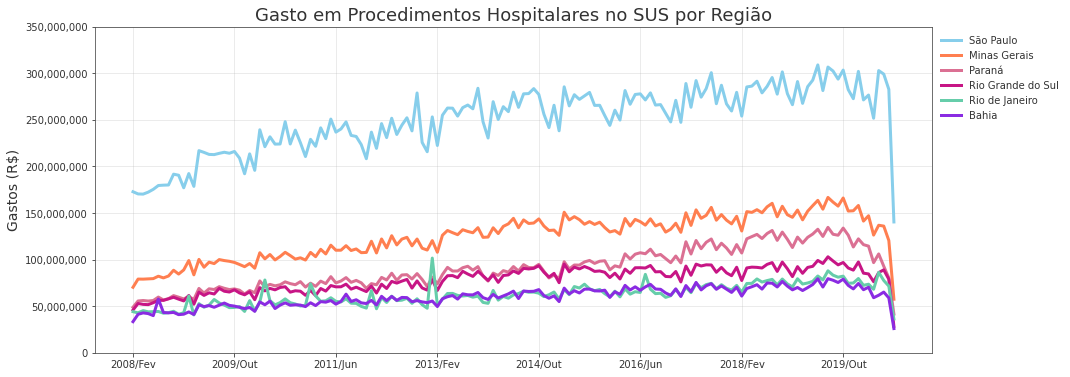

In [755]:
cores = ['SkyBlue', 'Coral', '#DB7093', '#C71585', '#66CDAA', 'BlueViolet']

ax = estados_escolhidos.T.plot(figsize = (15, 6), linewidth = 3, color = cores)
legend = plt.legend(nomes_estados_grafico_escolhidos, loc = 'upper left', bbox_to_anchor=(1, 1), framealpha = 0)
plt.setp(legend.get_texts(), color='#333333')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14, color = '#333333')
ax.set_ylim((0,350000000))
ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['top'].set_color('#4d4d4d')
ax.spines['right'].set_color('#4d4d4d')
ax.spines['left'].set_color('#4d4d4d')
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis= 'y', colors='#333333')
plt.title('Gasto em Procedimentos Hospitalares no SUS por Região', fontsize = 18, color = '#333333')
plt.grid(alpha = 0.3)
plt.show()

O estado da Bahia teve gastos muito próximos aos do estado do Rio de Janeiro.

## Desafio 05

Os picos nas curvas podem estar relacionados às crises de dengue?

Como o pico mais pronunciado nessa época é do estado do Rio de Janeiro, irei fazer a análise para esse estado.

Para isso, extraí dados dos casos de dengue na cidade do Rio de Janeiro (corresponde a 38% da população de todo o estado).

In [756]:
dados_dengue = pd.read_csv('dengue_rio.csv')
dados_dengue.head(3)

,id,aps,se,data,tweets,casos,casos_est,casos_estmin,casos_estmax,tmin,rt,prt1,inc,nivel,sum
0,1870,1.00,201518,2015-05-03,598.00,58,58.00,58.00,58.00,21.00,1.40,0.95,25.55,3,1302
1,354600,5.30,201814,2018-04-01,44.00,19,19.00,19.00,19.00,24.43,1.14,0.65,5.16,2,1302
2,931875,1.00,202041,2020-10-04,28.00,0,0.00,0.00,0.00,23.57,0.00,0.00,0.00,1,1302


Abaixo, a limpeza dos dados da dengue, excluindo os dados com data '1970-01-01' e organizando pela data de forma crescente.

In [757]:
dados_data = dados_dengue[ dados_dengue['data'] == '1970-01-01' ]
dados_dengue = dados_dengue.drop(dados_data.index, axis=0)

In [758]:
dados_dengue = dados_dengue.groupby(by = 'data').sum()
dados_dengue.sort_index(inplace = True)

dados_dengue.head(3)

,id,aps,se,tweets,casos,casos_est,casos_estmin,casos_estmax,tmin,rt,prt1,inc,nivel,sum
data,,,,,,,,,,,,,,
2012-12-30,29192,34.50,2013010,960.00,416,416.00,416.00,416.00,145.29,13.97,6.79,75.60,20,13020
2013-01-06,29202,34.50,2013020,1340.00,702,702.00,702.00,702.00,237.80,19.58,9.75,120.87,20,13020
2013-01-13,29212,34.50,2013030,2120.00,779,779.00,779.00,779.00,221.29,16.60,9.08,135.03,21,13020


In [759]:
dados_dengue = dados_dengue.loc[:'2020-08-23']

Selecionei os dados do SUS a partir de 2012 para ter um período semelhante ao dos dados da dengue.

In [760]:
dados.columns

Index(['Unidade da Federação', '1992/Mar', '1992/Abr', '1993/Mai', '1993/Dez',
       '1994/Jan', '1994/Fev', '1994/Mai', '1994/Ago', '1994/Nov',
       ...
       '2020/Fev', '2020/Mar', '2020/Abr', '2020/Mai', '2020/Jun', '2020/Jul',
       '2020/Ago', 'Total', 'Nome do Estado', 'Região'],
      dtype='object', length=282)

In [761]:
dados_a_partir_2012 = ordenado_por_total.loc[:, '2012/Nov':]

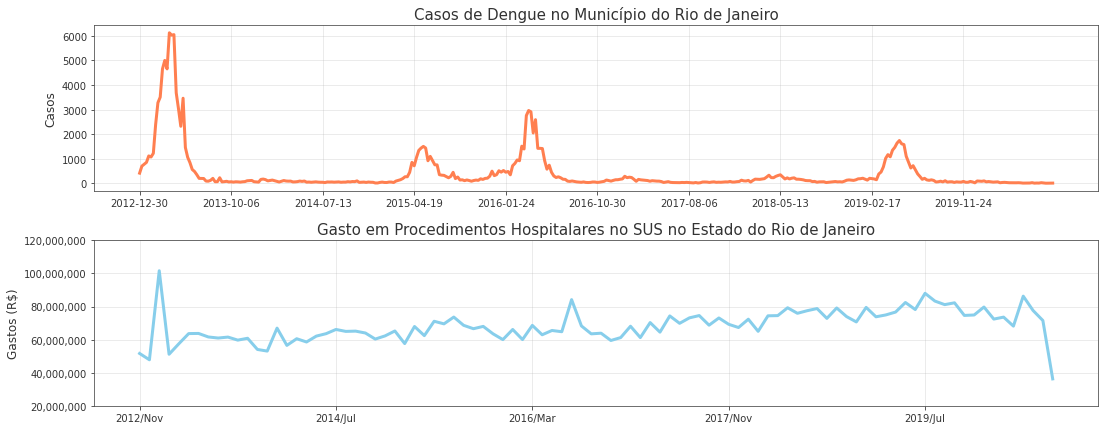

In [762]:
fig, ax = plt.subplots(2,1, sharey = 'none', figsize = (18,7))
plt.subplots_adjust(hspace = 0.3)

ax[0].plot(dados_dengue['casos'], color = 'Coral', linewidth = 3)
ax[1] = dados_a_partir_2012.loc['33 Rio de Janeiro', :].T.plot(linewidth = 3, color = 'SkyBlue')

ax[0].set_ylabel('Casos', fontsize = 'large', color = '#333333')
ax[1].set_ylabel('Gastos (R$)', fontsize = 'large', color = '#333333')

ax[0].set_xticks(dados_dengue.index[::40])

ax[1].yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax[1].set_ylim((20000000,120000000))

for i in range (2):
  ax[i].spines['bottom'].set_color('#4d4d4d')
  ax[i].spines['top'].set_color('#4d4d4d')
  ax[i].spines['right'].set_color('#4d4d4d')
  ax[i].spines['left'].set_color('#4d4d4d')
  ax[i].tick_params(axis='x', colors='#333333')
  ax[i].tick_params(axis= 'y', colors='#333333')

ax[0].set_title('Casos de Dengue no Município do Rio de Janeiro', fontsize = 15, color = '#333333')
ax[1].set_title('Gasto em Procedimentos Hospitalares no SUS no Estado do Rio de Janeiro', fontsize = 15, color = '#333333')

ax[0].grid(alpha = 0.3)
ax[1].grid(alpha = 0.3)

plt.show()

## Desafio 06

Plotar apenas os estados do sudeste e verificar se há um pico em 2012/2013 de forma similar entre eles.

Criei um DataFrame com os dados dos estados da região Sudeste nos anos de 2012 e 2013.

In [763]:
dados_anos_1213 = dados.query('Região == "Sudeste"')

In [764]:
nomes_sudeste = dados.query('Região == "Sudeste"')['Nome do Estado']
nomes_sudeste

16      Minas Gerais
17    Espírito Santo
18    Rio de Janeiro
19         São Paulo
Name: Nome do Estado, dtype: object

In [765]:
dados_anos_1213 = dados_anos_1213.loc[:, '2012/Jan':'2013/Dez']
dados_anos_1213.set_index(nomes_sudeste, inplace = True)
dados_anos_1213

,2012/Jan,2012/Fev,2012/Mar,2012/Abr,2012/Mai,2012/Jun,2012/Jul,2012/Ago,2012/Set,2012/Out,2012/Nov,2012/Dez,2013/Jan,2013/Fev,2013/Mar,2013/Abr,2013/Mai,2013/Jun,2013/Jul,2013/Ago,2013/Set,2013/Out,2013/Nov,2013/Dez
Nome do Estado,,,,,,,,,,,,,,,,,,,,,,,,
Minas Gerais,119729123.95,107152088.11,122163466.17,112569278.74,125667124.63,115761642.39,122007277.22,123931923.67,114792200.87,122099210.56,112211647.27,110269165.40,120408181.68,107894647.44,126117866.62,131252895.30,128908897.64,126749699.43,132079377.42,130218634.31,128834914.24,134275965.54,123888837.02,124208668.26
Espírito Santo,17148053.04,16786617.91,18660232.19,17052617.59,18723134.38,18137860.29,19880778.72,19375502.24,19258247.92,19200340.35,17956886.69,18264308.06,19123320.52,17941358.17,19869295.44,19890295.23,19979773.02,19406981.92,20365841.76,20876552.66,19758345.74,21145926.80,19684239.72,18868882.32
Rio de Janeiro,66704785.22,47271040.50,59343380.91,54013055.54,60750595.80,55987811.14,56456564.43,58525773.94,53057490.45,57949268.00,51632756.44,47807776.69,101639542.67,51149155.06,57518964.22,63649897.51,63742112.57,61609297.74,60961363.30,61533049.95,59693099.62,60820818.31,54055032.39,53076026.99
São Paulo,236793097.61,219391949.71,245948266.79,230941852.55,251697218.42,234257242.25,244245230.34,252189769.02,238132456.09,278819909.14,225775860.13,215780410.93,253136778.93,222449529.20,254938242.41,262649865.82,262509975.32,254003022.72,263071967.69,265891360.31,261812951.34,283880125.83,247979952.13,230481632.33


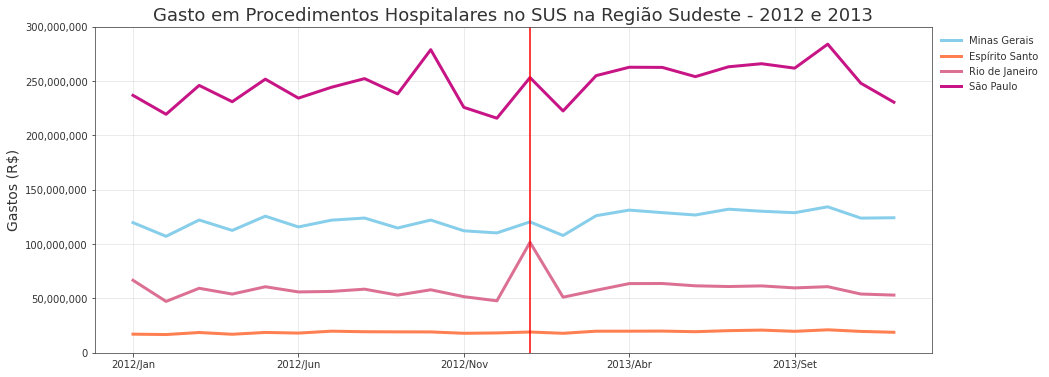

In [766]:
cores = ['SkyBlue', 'Coral', '#DB7093', '#C71585', '#66CDAA', 'BlueViolet']

ax = dados_anos_1213.T.plot(figsize = (15, 6), linewidth = 3, color = cores)
legend = plt.legend(nomes_sudeste, loc = 'upper left', bbox_to_anchor=(1, 1), framealpha = 0)
plt.setp(legend.get_texts(), color='#333333')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14, color = '#333333')
ax.set_ylim((0,300000000))
ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['top'].set_color('#4d4d4d')
ax.spines['right'].set_color('#4d4d4d')
ax.spines['left'].set_color('#4d4d4d')
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis= 'y', colors='#333333')
plt.axvline(x = 12, color='red')
plt.title('Gasto em Procedimentos Hospitalares no SUS na Região Sudeste - 2012 e 2013', fontsize = 18, color = '#333333')
plt.grid(alpha = 0.3)
plt.show()

O pico observado nos gastos é notável para os estados de São Paulo e Rio de Janeiro, em janeiro de 2013.

Para o estado de Minas Gerais esse pico é menos pronunciado e para o Espírito Santo ele não é observado.

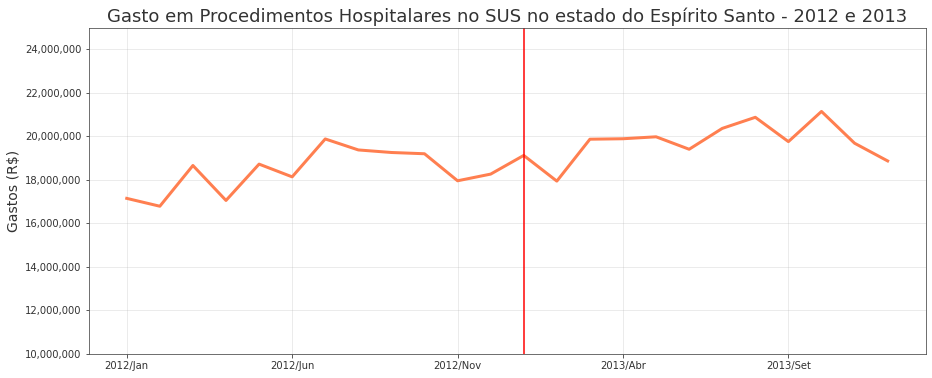

In [767]:
cores = ['SkyBlue', 'Coral', '#DB7093', '#C71585', '#66CDAA', 'BlueViolet']

ax = dados_anos_1213.T.plot(figsize = (15, 6), linewidth = 3, color = cores, legend = False)

ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14, color = '#333333')
ax.set_ylim((10000000,25000000))
ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['top'].set_color('#4d4d4d')
ax.spines['right'].set_color('#4d4d4d')
ax.spines['left'].set_color('#4d4d4d')
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis= 'y', colors='#333333')
plt.axvline(x = 12, color='red')
plt.title('Gasto em Procedimentos Hospitalares no SUS no estado do Espírito Santo - 2012 e 2013', fontsize = 18, color = '#333333')
plt.grid(alpha = 0.3)
plt.show()

Mudando a escala do gráfico, notamos que há um aumento nos gastos em janeiro de 2013 ao comparar com os meses anteriores, porém menos pronunciado em comparação com os demais estados da região sudeste.

## Desafio 07

Adicionar novamente meu estado, ou outro se ele já estiver entre os 5 estados.

Novamente, como meu estado de residência já está entre os 5, adicionei o estado da Bahia à análise.

In [768]:
dados_anos_1213 = dados.query('Região == "Sudeste" | `Nome do Estado` == "Bahia"')

In [769]:
nomes_sudeste_bahia = dados.query('Região == "Sudeste" | `Nome do Estado` == "Bahia"')['Nome do Estado']
nomes_sudeste_bahia

15             Bahia
16      Minas Gerais
17    Espírito Santo
18    Rio de Janeiro
19         São Paulo
Name: Nome do Estado, dtype: object

In [770]:
dados_anos_1213 = dados_anos_1213.loc[:, '2012/Jan':'2013/Dez']
dados_anos_1213.set_index(nomes_sudeste_bahia, inplace = True)

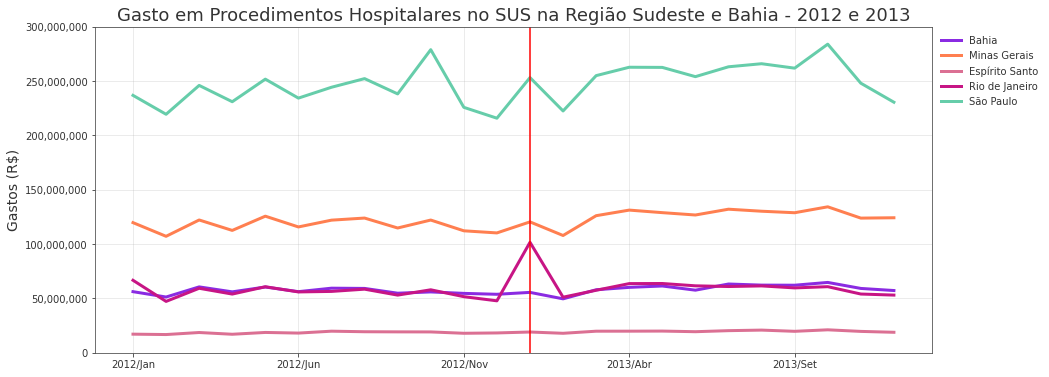

In [771]:
cores = ['BlueViolet', 'Coral', '#DB7093', '#C71585', '#66CDAA', 'BlueViolet']

ax = dados_anos_1213.T.plot(figsize = (15, 6), linewidth = 3, color = cores)
legend = plt.legend(nomes_sudeste_bahia, loc = 'upper left', bbox_to_anchor=(1, 1), framealpha = 0)
plt.setp(legend.get_texts(), color='#333333')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14, color = '#333333')
ax.set_ylim((0,300000000))
ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['top'].set_color('#4d4d4d')
ax.spines['right'].set_color('#4d4d4d')
ax.spines['left'].set_color('#4d4d4d')
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis= 'y', colors='#333333')
plt.axvline(x = 12, color='red')
plt.title('Gasto em Procedimentos Hospitalares no SUS na Região Sudeste e Bahia - 2012 e 2013', fontsize = 18, color = '#333333')
plt.grid(alpha = 0.3)
plt.show()

Os gastos no estado da Bahia são comparáveis aos gastos realizados no estado do Rio de Janeiro e, a princípio, não apresenta um pico como ocorre nos estados da região sudeste (conforme analisado no desafio anterior).

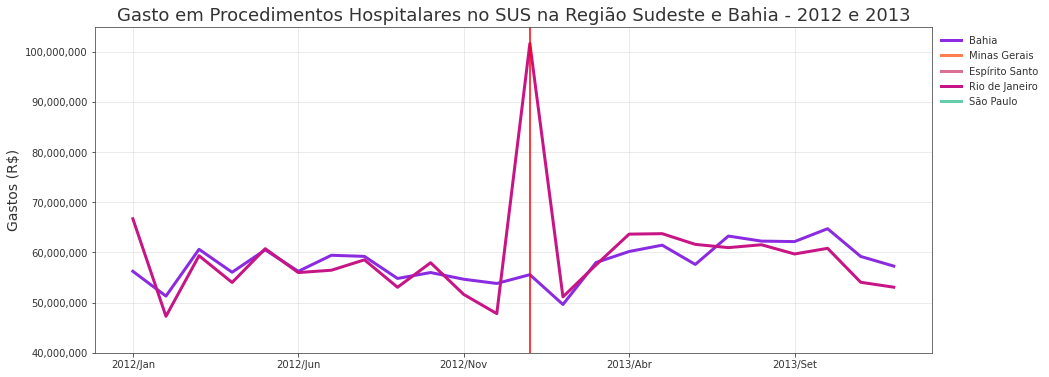

In [772]:
cores = ['BlueViolet', 'Coral', '#DB7093', '#C71585', '#66CDAA', 'BlueViolet']

ax = dados_anos_1213.T.plot(figsize = (15, 6), linewidth = 3, color = cores)
legend = plt.legend(nomes_sudeste_bahia, loc = 'upper left', bbox_to_anchor=(1, 1), framealpha = 0)
plt.setp(legend.get_texts(), color='#333333')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.set_ylabel('Gastos (R$)', fontsize = 14, color = '#333333')
ax.set_ylim((40000000,105000000))
ax.spines['bottom'].set_color('#4d4d4d')
ax.spines['top'].set_color('#4d4d4d')
ax.spines['right'].set_color('#4d4d4d')
ax.spines['left'].set_color('#4d4d4d')
ax.tick_params(axis='x', colors='#333333')
ax.tick_params(axis= 'y', colors='#333333')
plt.axvline(x = 12, color='red')
plt.title('Gasto em Procedimentos Hospitalares no SUS na Região Sudeste e Bahia - 2012 e 2013', fontsize = 18, color = '#333333')
plt.grid(alpha = 0.3)
plt.show()

Nesse segundo gráfico dei um "zoom" na escala para visualizar melhor e confirmar que não há esse pico nos gastos no estado da Bahia em janeiro de 2013.

# Aula 04

In [773]:
ordenado_por_total = ordenado_por_total / 1000000

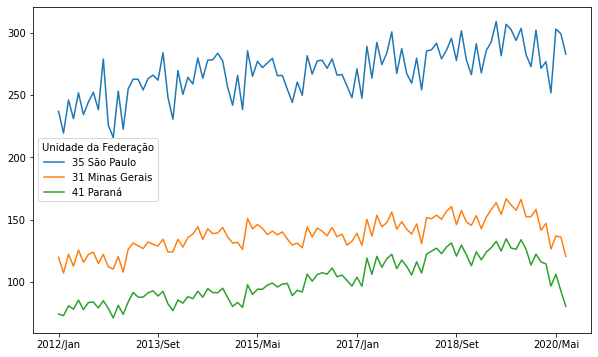

In [774]:
ordenado_por_total[ordenado_por_total.columns[47:150]].head(3).T.plot(figsize = (10, 6))

(0.0, 350.0)

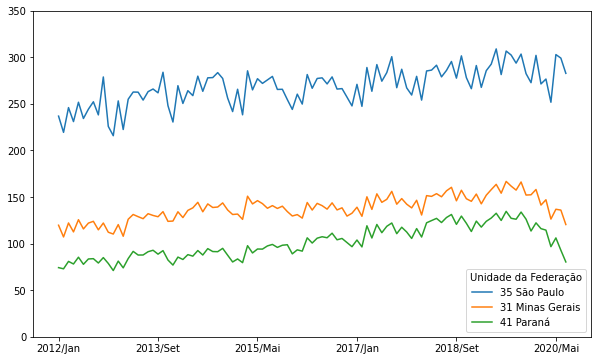

In [775]:
ordenado_por_total[ordenado_por_total.columns[47:150]].head(3).T.plot(figsize = (10, 6))
plt.ylim(0, 350)

(100.0, 350.0)

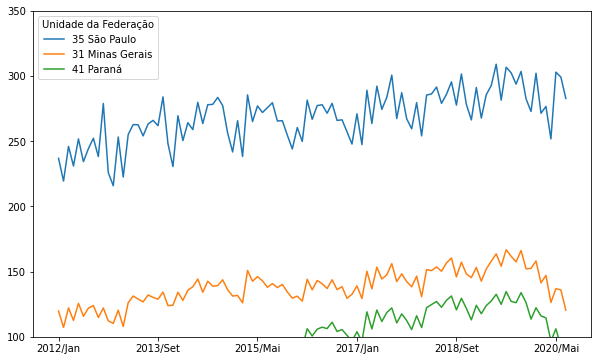

In [776]:
ordenado_por_total[ordenado_por_total.columns[47:150]].head(3).T.plot(figsize = (10, 6))
plt.ylim(100, 350)

(0.0, 350.0)

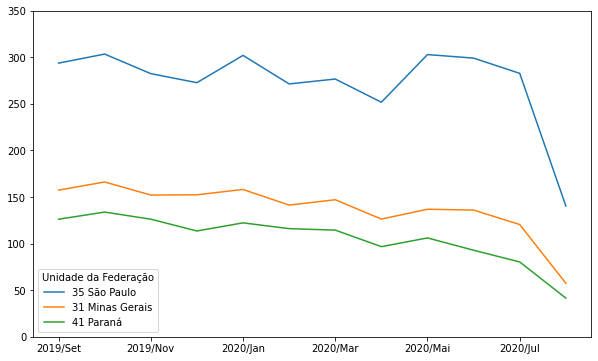

In [777]:
ordenado_por_total[ordenado_por_total.columns[-12:]].head(3).T.plot(figsize = (10, 6))
plt.ylim(0, 350)

Para essa janela de tempo parece que os gastos estão caindo, porém se pegamos um período mais longo, vemos que a tendência é de subida.

Esse período de queda no final da série, pode ser devido à pandemia, por causa da redução de acompanhamentos, tratamentos, etc relacionados a outras doenças que não a Covid-19.

(0.0, 350.0)

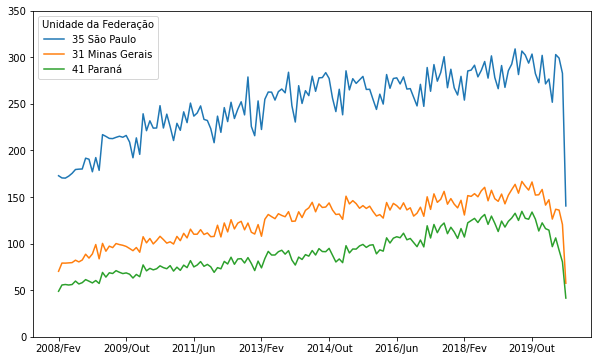

In [778]:
ordenado_por_total.head(3).T.plot(figsize = (10, 6))
plt.ylim(0, 350)

O tamanho do gráfico pode influenciar na impressão que ele passa do crescimento dos gastos, por exemplo.

No gráfico abaixo, isso ocorre pela inclinação das curvas aparentar ser maior devido à menor dimensão horizontal.

(0.0, 350.0)

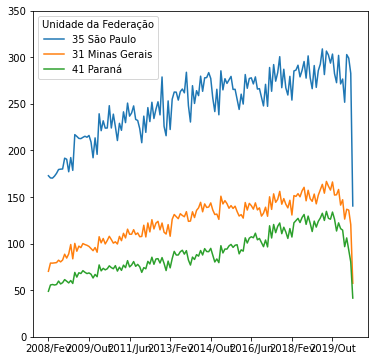

In [779]:
ordenado_por_total.head(3).T.plot(figsize = (6, 6))
plt.ylim(0, 350)

## Desafio 01

Refaça as manipulações feitas em aulas e gaste um tempo analisando os dados e entendendo os efeitos das manipulações.

## Desafio 02

Reflita sobre os problemas na manipulação de dados e discuta esse assunto no Discord.

# Aula 05

In [780]:
mes_mais_recente = ordenado_por_total.columns[-1]
mes_mais_recente

'2020/Ago'

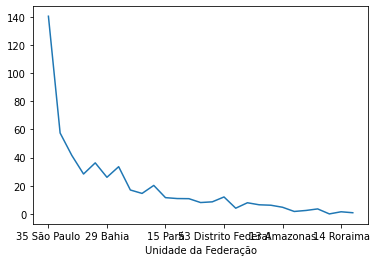

In [781]:
gastos_do_mais_recente = ordenado_por_total[mes_mais_recente]
gastos_do_mais_recente.plot()

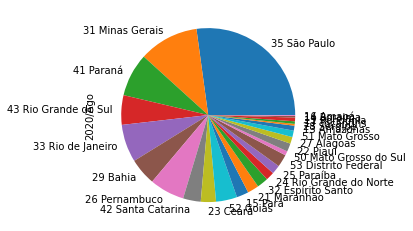

In [782]:
gastos_do_mais_recente.plot(kind = 'pie')

Problemas com a pizza:

- Legenda horrível
- Número de fatias inacreditável
- Cores repetidas
- Difícil definir a ordem
- Comparação ruim

Única vantagem até agora:

- O gráfico está ordenado

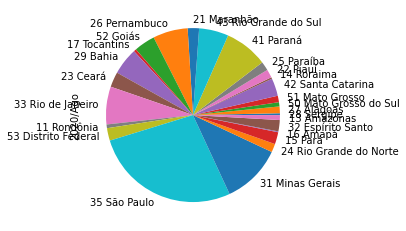

In [783]:
gastos_do_mais_recente.sample(frac = 1).plot(kind = 'pie')

Sem ordenar os dados fica pior ainda!!

In [784]:
# Visualização simples para valores absolutos

gastos_do_mais_recente

Unidade da Federação
35 São Paulo             140.41
31 Minas Gerais           57.47
41 Paraná                 41.54
43 Rio Grande do Sul      28.35
33 Rio de Janeiro         36.26
29 Bahia                  26.02
26 Pernambuco             33.54
42 Santa Catarina         16.99
23 Ceará                  14.56
52 Goiás                  20.24
15 Pará                   11.56
21 Maranhão               10.92
32 Espírito Santo         10.82
24 Rio Grande do Norte     8.08
25 Paraíba                 8.59
53 Distrito Federal       12.04
50 Mato Grosso do Sul      4.06
22 Piauí                   7.93
27 Alagoas                 6.49
51 Mato Grosso             6.17
13 Amazonas                4.73
28 Sergipe                 1.74
17 Tocantins               2.45
11 Rondônia                3.56
12 Acre                    0.00
14 Roraima                 1.52
16 Amapá                   0.83
Name: 2020/Ago, dtype: float64

In [785]:
(gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']).sort_values(ascending = False)

Unidade da Federação
35 São Paulo             3.87
31 Minas Gerais          1.58
41 Paraná                1.15
33 Rio de Janeiro        1.00
26 Pernambuco            0.93
43 Rio Grande do Sul     0.78
29 Bahia                 0.72
52 Goiás                 0.56
42 Santa Catarina        0.47
23 Ceará                 0.40
53 Distrito Federal      0.33
15 Pará                  0.32
21 Maranhão              0.30
32 Espírito Santo        0.30
25 Paraíba               0.24
24 Rio Grande do Norte   0.22
22 Piauí                 0.22
27 Alagoas               0.18
51 Mato Grosso           0.17
13 Amazonas              0.13
50 Mato Grosso do Sul    0.11
11 Rondônia              0.10
17 Tocantins             0.07
28 Sergipe               0.05
14 Roraima               0.04
16 Amapá                 0.02
12 Acre                  0.00
Name: 2020/Ago, dtype: float64

In [786]:
((gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']).sort_values(ascending = False)).head(5)

Unidade da Federação
35 São Paulo        3.87
31 Minas Gerais     1.58
41 Paraná           1.15
33 Rio de Janeiro   1.00
26 Pernambuco       0.93
Name: 2020/Ago, dtype: float64

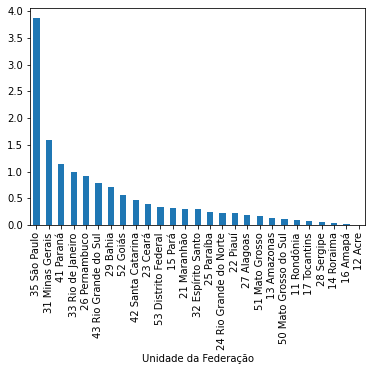

In [787]:
((gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']).sort_values(ascending = False)).plot(kind = 'bar')

## Desafio 01

Criar a tabela de comparação para meu estado.

In [788]:
comparacao_sp = ((gastos_do_mais_recente / gastos_do_mais_recente.loc['35 São Paulo']).sort_values(ascending = False))
comparacao_sp

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.41
41 Paraná                0.30
33 Rio de Janeiro        0.26
26 Pernambuco            0.24
43 Rio Grande do Sul     0.20
29 Bahia                 0.19
52 Goiás                 0.14
42 Santa Catarina        0.12
23 Ceará                 0.10
53 Distrito Federal      0.09
15 Pará                  0.08
21 Maranhão              0.08
32 Espírito Santo        0.08
25 Paraíba               0.06
24 Rio Grande do Norte   0.06
22 Piauí                 0.06
27 Alagoas               0.05
51 Mato Grosso           0.04
13 Amazonas              0.03
50 Mato Grosso do Sul    0.03
11 Rondônia              0.03
17 Tocantins             0.02
28 Sergipe               0.01
14 Roraima               0.01
16 Amapá                 0.01
12 Acre                  0.00
Name: 2020/Ago, dtype: float64

Achei curioso esse valor de 0 do Acre e, dando uma olhada do DataSet, no mês mais recente (Ago/2020) não há dados disponíveis para o Acre.

Assim, achei interessante analisar o mês anterior (Jul/2020).

In [789]:
gastos_do_segundo_mais_recente = ordenado_por_total[ordenado_por_total.columns[-2]]
gastos_do_segundo_mais_recente

Unidade da Federação
35 São Paulo             282.71
31 Minas Gerais          120.47
41 Paraná                 80.32
43 Rio Grande do Sul      78.93
33 Rio de Janeiro         71.54
29 Bahia                  58.90
26 Pernambuco             62.33
42 Santa Catarina         51.76
23 Ceará                  30.81
52 Goiás                  33.50
15 Pará                   27.62
21 Maranhão               24.37
32 Espírito Santo         27.46
24 Rio Grande do Norte    19.59
25 Paraíba                15.49
53 Distrito Federal       22.23
50 Mato Grosso do Sul     12.51
22 Piauí                  18.02
27 Alagoas                13.09
51 Mato Grosso            13.08
13 Amazonas               13.36
28 Sergipe                 3.31
17 Tocantins               4.49
11 Rondônia                7.41
12 Acre                    1.16
14 Roraima                 2.74
16 Amapá                   2.16
Name: 2020/Jul, dtype: float64

Para julho de 2020 não temos nenhum valor em branco (zerado).

In [790]:
comparacao_sp = ((gastos_do_segundo_mais_recente / gastos_do_segundo_mais_recente.loc['35 São Paulo']).sort_values(ascending = False))
comparacao_sp

Unidade da Federação
35 São Paulo             1.00
31 Minas Gerais          0.43
41 Paraná                0.28
43 Rio Grande do Sul     0.28
33 Rio de Janeiro        0.25
26 Pernambuco            0.22
29 Bahia                 0.21
42 Santa Catarina        0.18
52 Goiás                 0.12
23 Ceará                 0.11
15 Pará                  0.10
32 Espírito Santo        0.10
21 Maranhão              0.09
53 Distrito Federal      0.08
24 Rio Grande do Norte   0.07
22 Piauí                 0.06
25 Paraíba               0.05
13 Amazonas              0.05
27 Alagoas               0.05
51 Mato Grosso           0.05
50 Mato Grosso do Sul    0.04
11 Rondônia              0.03
17 Tocantins             0.02
28 Sergipe               0.01
14 Roraima               0.01
16 Amapá                 0.01
12 Acre                  0.00
Name: 2020/Jul, dtype: float64

Nesse caso, o Acre aparece com o valor 0 na comparação devido ao número de casas decimais mostradas.

Multiplicando por 100, teríamos a porcentagem dos gastos em SP que o AC representa:

In [791]:
comparativo_AC_SP = (gastos_do_segundo_mais_recente.loc['12 Acre'] / gastos_do_segundo_mais_recente.loc['35 São Paulo'] *100).round(2)

print('Os gastos no estado do Acre representam {}% dos gastos no estado de São Paulo.'.format(comparativo_AC_SP))

Os gastos no estado do Acre representam 0.41% dos gastos no estado de São Paulo.


Pela comparação gerada, notamos alguns pontos interessantes:

- O segundo estado em gastos no mês avaliado foi MG, cujo valor corresponde a menos da metade dos gasto em SP (43% para ser mais exato). SP liderou os gastos com uma boa folga.
- Não há nenhum estado da região Norte entre os top 10 de maiores gastos. Todos os estados do Norte apresentam gasto menor ou igual a 10% em relação a SP.
- Da região Sudeste o Espírito Santo foi o estado com menor gasto em comparação a SP (apenas 10%) e não figurando nos top 10.

## Desafio 02

Colocar grid no gráfico dos gastos no mês mais recente por estado.

In [792]:
comparacao_rj = ((gastos_do_mais_recente / gastos_do_mais_recente.loc['33 Rio de Janeiro']).sort_values(ascending = False)).to_frame().reset_index()

In [793]:
nomes_estados = comparacao_rj['Unidade da Federação'].str.slice(start = 3)
comparacao_rj.set_index(nomes_estados, inplace = True)

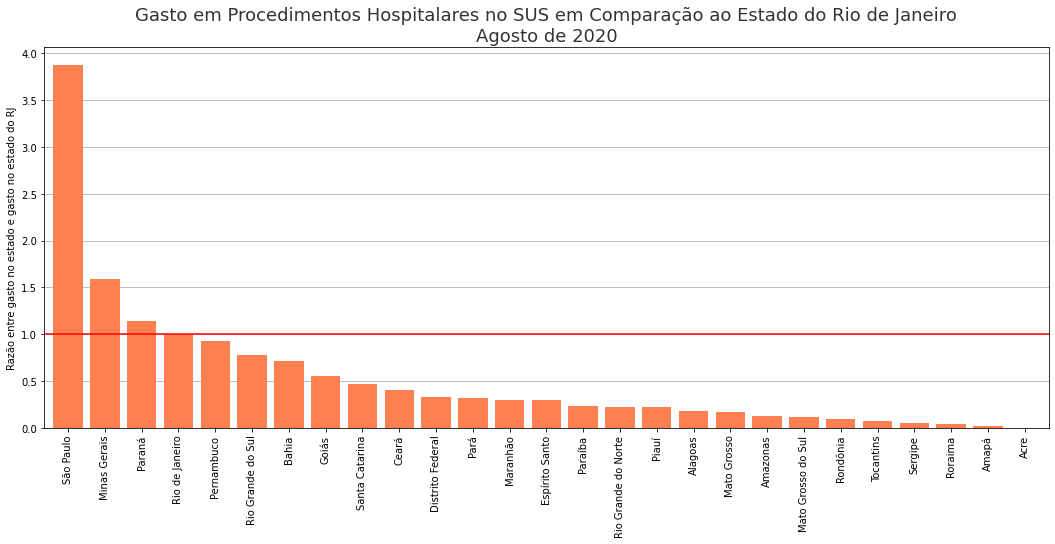

In [794]:
comparacao_rj.plot(kind = 'bar', figsize = (18,7), zorder = 2, width = 0.8, legend = False, color = 'Coral')
plt.axhline(y = 1, color = 'red')
plt.grid(axis = 'y', zorder=0)
plt.ylabel('Razão entre gasto no estado e gasto no estado do RJ')
plt.xlabel(None)
plt.title('Gasto em Procedimentos Hospitalares no SUS em Comparação ao Estado do Rio de Janeiro\nAgosto de 2020', fontsize = 18, color = '#333333')
plt.show()

Adicionei o grid horizontal apenas.

Não vi vantagem em manter o vertical, pois para a leitura dos valores basta o topo da coluna referente a cada estado. Dessa forma fica menos poluído o gráfico.

A linha horizontal em 1,0 auxilia a rápida visualização dos estados que tiveram gastos acima ou abaixo do RJ.

## Desafio 03

Fazer o gráfico comparando os estados para o meu estado.

In [795]:
comparacao_sp = ((gastos_do_segundo_mais_recente / gastos_do_segundo_mais_recente.loc['35 São Paulo']).sort_values(ascending = False)).to_frame().reset_index()

In [796]:
nomes_estados = comparacao_sp['Unidade da Federação'].str.slice(start = 3)
comparacao_sp.set_index(nomes_estados, inplace = True)

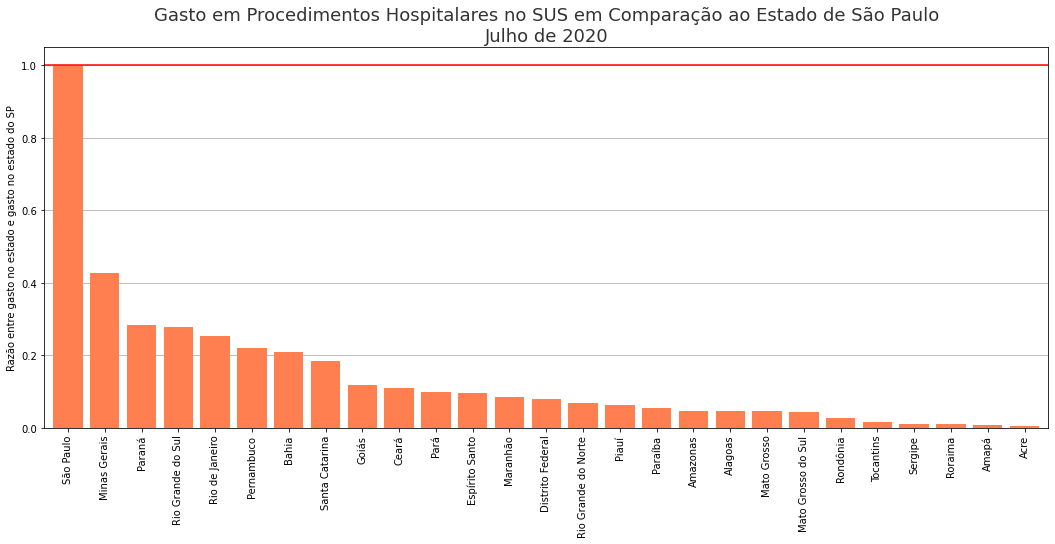

In [797]:
comparacao_sp.plot(kind = 'bar', figsize = (18,7), zorder = 2, width = 0.8, legend = False, color = 'Coral')
plt.axhline(y = 1, color = 'red')
plt.grid(axis = 'y', zorder=0)
plt.ylabel('Razão entre gasto no estado e gasto no estado do SP')
plt.xlabel(None)
plt.title('Gasto em Procedimentos Hospitalares no SUS em Comparação ao Estado de São Paulo\nJulho de 2020', fontsize = 18, color = '#333333')
plt.show()

Todos os estados possuem gastos menores em relação ao estado de SP.

O gráfico torna mais visual as conclusões do Desafio 01/Aula 05.

## Desafio 04

Gasto por população para dois estados.

Para realizar essa comparação, extraí os dados da população de cada estado a partir da página da Wikipedia. [Fonte](https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o)

Estes dados são estimativas realizadas pelo IBGE relativas a 1º de julho de 2020.

Vale ressaltar que estou usando a população atual, portanto para os períodos anteriores o valor gasto por habitante pode não ser representativo.

In [814]:
tables = pd.read_html("https://pt.wikipedia.org/wiki/Lista_de_unidades_federativas_do_Brasil_por_popula%C3%A7%C3%A3o")

populacao_estados = tables[0]
populacao_estados.head(3)

,Posição,Unidade federativa,População,% da pop. total,País comparável (habitantes)
0,1,São Paulo,46 289 333,"21,9%",Espanha (46 439 864)
1,2,Minas Gerais,21 331 292,"10,1%",Sri Lanka (20 675 000)
2,3,Rio de Janeiro,17 366 189,"8,2%",Países Baixos (16 922 900)


O problema aqui é que os valores de população estão como *strings*.

Abaixo retirei os espaços em branco que foram utilizados como marcador de milhares e transformando os valores em *int*.

In [815]:
populacao_estados['População'] = populacao_estados['População'].replace(' ', '', regex=True)
populacao_estados['População'] = populacao_estados['População'].astype(float)

In [816]:
populacao_estados.sort_values(by = 'Unidade federativa', inplace = True)
populacao_estados.set_index('Unidade federativa', inplace = True)
populacao_estados.head(2)

,Posição,População,% da pop. total,País comparável (habitantes)
Unidade federativa,,,,
Acre,25,894470.00,"0,4%",Fiji (859 178)
Alagoas,18,3351543.00,"1,6%",Uruguai (3 415 866)


Em seguida, calculei o valor gasto por habitante em reais para cada estado.

In [822]:
dados_por_populacao = dados.reset_index()
dados_por_populacao.sort_values(by = 'Nome do Estado', inplace = True)
dados_por_populacao.set_index('Nome do Estado', inplace = True)
dados_por_populacao.head(2)

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Região
Nome do Estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,420668039.63,Norte
Alagoas,27 Alagoas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1237.07,-,-,...,16475134.53,16993183.55,16039891.10,16428152.87,16460530.89,15069229.61,16407623.75,14108283.71,17291774.71,18077005.49,18191826.64,16601616.44,18017803.20,18221249.82,16273547.19,18384714.63,16186511.59,14723252.84,18036475.81,16432943.70,16383367.36,16967319.09,18401780.88,16665270.65,18010279.58,17668105.59,17493927.42,18373191.31,16429689.91,15969025.28,17263960.88,15228725.99,15998721.86,14241361.44,15254204.31,14278872.07,13087850.40,6487947.82,2104405303.11,Nordeste


In [823]:
dados_por_populacao = dados_por_populacao[colunas_interessadas]

In [826]:
dados_por_populacao.head(2)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Nome do Estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3161446.53,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00
Alagoas,8112220.30,9210505.56,10466691.94,9844096.03,10288668.11,9385440.40,9262767.68,9228201.96,9464597.85,9578540.01,9361247.91,10121881.47,8994586.40,12040996.68,11651218.51,11471079.17,10955769.81,11345518.14,11715157.35,11732050.72,12050093.88,11895951.83,11016104.25,11200586.26,10243568.76,13197956.95,12543380.70,13186678.00,11564476.61,11698448.97,12689693.74,12333599.13,12248867.23,12103492.69,10972429.23,11056588.96,11826444.96,13178546.52,12260249.74,13929545.92,...,16734816.88,15508169.95,16475134.53,16993183.55,16039891.10,16428152.87,16460530.89,15069229.61,16407623.75,14108283.71,17291774.71,18077005.49,18191826.64,16601616.44,18017803.20,18221249.82,16273547.19,18384714.63,16186511.59,14723252.84,18036475.81,16432943.70,16383367.36,16967319.09,18401780.88,16665270.65,18010279.58,17668105.59,17493927.42,18373191.31,16429689.91,15969025.28,17263960.88,15228725.99,15998721.86,14241361.44,15254204.31,14278872.07,13087850.40,6487947.82


In [827]:
dados_por_populacao = dados_por_populacao.div(populacao_estados['População'], axis=0)
dados_por_populacao.head(2)

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Mai,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago
Nome do Estado,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Acre,1.95,2.30,2.30,2.49,2.36,2.27,2.11,2.33,2.49,2.37,2.46,2.41,2.33,2.77,2.68,2.92,2.43,2.29,1.92,1.50,2.56,2.75,2.52,2.66,2.33,2.87,2.89,2.84,2.59,2.55,2.74,2.88,2.94,2.81,2.80,3.07,2.77,3.13,2.99,3.51,...,3.53,3.75,3.98,3.77,3.74,3.75,3.52,2.95,3.32,3.10,3.42,3.21,3.55,3.42,3.64,3.40,3.27,3.49,2.77,2.55,2.90,2.50,2.76,3.33,3.43,3.63,3.99,3.33,3.35,3.68,3.55,3.31,3.65,3.33,3.20,2.76,2.67,2.46,1.30,0.00
Alagoas,2.42,2.75,3.12,2.94,3.07,2.80,2.76,2.75,2.82,2.86,2.79,3.02,2.68,3.59,3.48,3.42,3.27,3.39,3.50,3.50,3.60,3.55,3.29,3.34,3.06,3.94,3.74,3.93,3.45,3.49,3.79,3.68,3.65,3.61,3.27,3.30,3.53,3.93,3.66,4.16,...,4.99,4.63,4.92,5.07,4.79,4.90,4.91,4.50,4.90,4.21,5.16,5.39,5.43,4.95,5.38,5.44,4.86,5.49,4.83,4.39,5.38,4.90,4.89,5.06,5.49,4.97,5.37,5.27,5.22,5.48,4.90,4.76,5.15,4.54,4.77,4.25,4.55,4.26,3.91,1.94


In [848]:
dados_por_populacao = dados_por_populacao.loc[:, '2020/Jan':'2020/Jul']

In [857]:
gastos_por_habitante = dados_por_populacao.mean(axis = 1).sort_values(ascending = False)

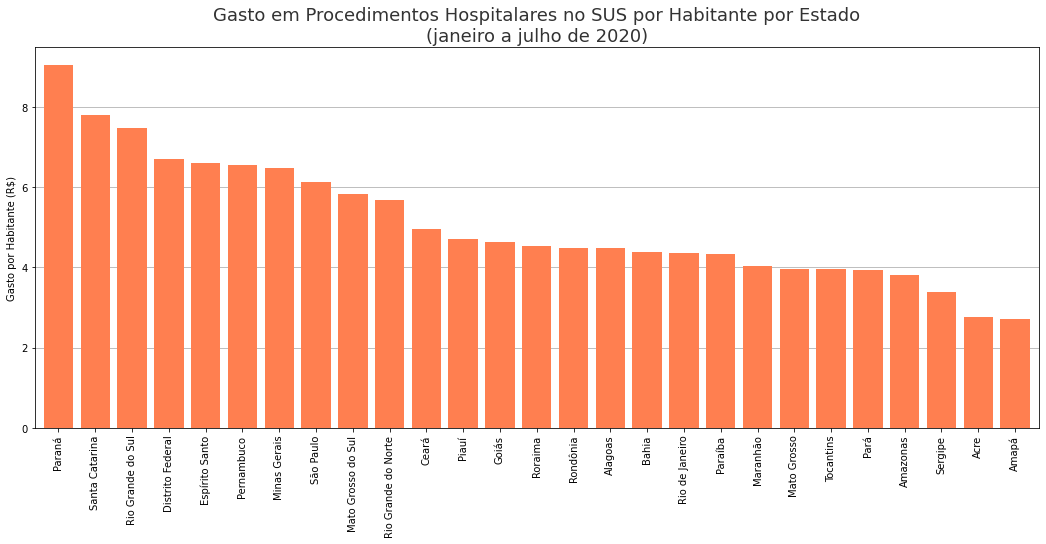

In [861]:
gastos_por_habitante.plot(kind = 'bar', figsize = (18,7), zorder = 2, width = 0.8, legend = False, color = 'Coral')
plt.grid(axis = 'y', zorder=0)
plt.ylabel('Gasto por Habitante (R$)')
plt.xlabel(None)
plt.title('Gasto em Procedimentos Hospitalares no SUS por Habitante por Estado\n(janeiro a julho de 2020)', fontsize = 18, color = '#333333')
plt.show()

Analisando os dados de gastos por habitante em 2020, podemos observar:

- O estado que mais gasta com procedimentos hospitalares no SUS por habitantes é o Paraná, que em análises anteriores foi o 3º em valores absolutos.
- São Paulo que foi o primeiro estado em valor absoluto, aparece na 8ª posição de gastos/habitante.
- Os estados com maior gasto por habitante são os estados da região Sul.

## Desafio 05

Tirar conclusões dos gráficos e compartilhar no Discord.

## Super desafio

Escolher outro valor no TabNet (que não o valor aprovado) para analisar.